> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Medical No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In this dataset, I will analyze the Medical Appointment No Show dataset from Kaggle ([link to dataset](https://www.kaggle.com/joniarroba/noshowappointments)).  
My analysis will answer the following questions:
- Does the number of appointments that each patient make defines their possibility of not showing up for the appointment?
- Does the day of the week affects the show-up probability of the appointment?
- Does the time of the day of the schedule affects the show-up probability? (morning vs day vs night)
- Does the number of SMS received affects the show-up probability?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Loading Data

Below I will load the data and show the first rows of the data and the information about each columns of the data.

In [2]:
filename = 'data/noshowappointments-kagglev2-may-2016.csv'

df = pd.read_csv(filename)

### Fixing Column Names

First let's see the column names:

In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Firstly we can look at the column names. As you can see, they are in camel case, and one of the column has "-" instead of "\_". So first I'll fix the column names to be python friendly by:
- converting "-" to be "_"
- converting the column names to snake case and lower case using regex

In [4]:
# correct the column names to be snake case
df.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
df.rename(columns=lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower(), inplace=True)

Now let's see the column names:

In [5]:
df.columns

Index(['patient_id', 'appointment_i_d', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 's_m_s_received',
       'no_show'],
      dtype='object')

As you can see above, some camel case column names are converted wrongly like the "ID" becomes "i_d" and "SMS" becomes "s_m_s". So I'll fix them to be "id" and "sms" below.

In [6]:
df.rename(columns=lambda x: x.replace('s_m_s', 'sms'), inplace=True)
df.rename(columns=lambda x: x.replace('i_d', 'id'), inplace=True)

Now the column names have been fixed to be:

In [7]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

Lastly if you notice, one of the column names is `handcap`, which I believe is a typo. I'll correct the name to be `handicap`.

In [8]:
df.rename(columns={'handcap': 'handicap'}, inplace=True)

In [9]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

### Fixing Column Types

Now we'll move on to fixing the column types of the data. Below I'll show the data types of each column.

In [10]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As you can see in the info above, there are some interesting aspects to be fixed, summarized in below points:
- `patient_id` and `appointment_id` are both of float and integer types. However, they are actually just for identification, and the quantity of the numbers have no actual significance (one ID is not "higher" than the other ID). So in this case I'll convert those columns to be string instead.
- `scheduled_day` and `appointment_day` are all in string type, while actually they are datetime. So I'll convert those columns into datetime.
- For `scholarship`, `hipertension`, `diabetes`, and `alcoholism`, the description of the dataset ([link to dataset](https://www.kaggle.com/joniarroba/noshowappointments)) explains that those columns are of boolean type. So I'll convert them to be boolean.
- As for `handicap` and `sms_received`, they're rather special and will be processed in the next cells. In summary, I'll swap both values of the columns and convert the column `handicap` to be boolean, while the column `sms_received` stays as integer.
- `no_show` column will be converted into boolean as well, and will be converted into `show_up` column (where the original values will be converted), as this new column will be more intuitive.

#### Converting `patient_id` and `appointment_id`

First to be safe, let's check for duplicate values of these columns

In [12]:
print(f' Number of duplicated patient_id: {sum(df.patient_id.duplicated())}')
print(f' Number of duplicated appointment_id: {sum(df.appointment_id.duplicated())}')

 Number of duplicated patient_id: 48228
 Number of duplicated appointment_id: 0


Duplicated `patient_id` is expected because one patient can have multiple appointments.  
There is no duplicated `appointment_id`, which is good and as expected, because each appointment must have unique ID.

Now we'll move on to convert those columns to be string:

In [13]:
# casting to int64 is needed so that the resulting string does not contain the decimal points
df.patient_id = df.patient_id.astype('int64').astype(str)
df.appointment_id = df.appointment_id.astype(str)

In [14]:
df.head()[['patient_id', 'appointment_id']]

,patient_id,appointment_id
0,29872499824296,5642903
1,558997776694438,5642503
2,4262962299951,5642549
3,867951213174,5642828
4,8841186448183,5642494


In [15]:
df[['patient_id', 'appointment_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   patient_id      110527 non-null  object
 1   appointment_id  110527 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


The info above now confirms that the `patient_id` and `appointment_id` are now of string type.

#### Converting `scheduled_day` and `appointment_day`

First let's check whether their values are of correct datetime format.

In [16]:
df[['scheduled_day', 'appointment_day']].head()

,scheduled_day,appointment_day
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


The format looks good. I'll then proceed to convert them into datetime:

In [17]:
df.scheduled_day = pd.to_datetime(df.scheduled_day, infer_datetime_format=True)
df.appointment_day = pd.to_datetime(df.appointment_day, infer_datetime_format=True)

In [18]:
df[['scheduled_day', 'appointment_day']].head()

,scheduled_day,appointment_day
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29


In [19]:
df[['scheduled_day', 'appointment_day']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   scheduled_day    110527 non-null  datetime64[ns]
 1   appointment_day  110527 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


An interesting finding from the conversion result is on `appointment_day`. It seems that the values of the column are all having time 00:00:00. This makes sense, because the column's purpose is to show the day of the appointment, and not the time. Nonetheless, the info above confirms that now the columns are of datetime type.

#### Converting `scholarship`, `hipertension`, `diabetes`, and `alcoholism`

To be safe, first I'll check the columns' unique values.

In [20]:
print(f'"scholarship" unique values: {df.scholarship.unique()}')
print(f'"hipertension" unique values: {df.hipertension.unique()}')
print(f'"diabetes" unique values: {df.diabetes.unique()}')
print(f'"alcoholism" unique values: {df.alcoholism.unique()}')

"scholarship" unique values: [0 1]
"hipertension" unique values: [1 0]
"diabetes" unique values: [0 1]
"alcoholism" unique values: [0 1]


As you can see above, all of them are only of values 1's and 0's, so they are safe to be converted into boolean. What I mean by safe is: safe to be converted into boolean without altering the meaning of the columns. This point is crucial when we're dealing with the `handicap` and `sms_received` columns in the next section. I'll then convert them into boolean below.

In [21]:
df.scholarship = df.scholarship.astype(bool)
df.hipertension = df.hipertension.astype(bool)
df.diabetes = df.diabetes.astype(bool)
df.alcoholism = df.alcoholism.astype(bool)

In [22]:
df[['scholarship', 'hipertension', 'diabetes', 'alcoholism']].head()

,scholarship,hipertension,diabetes,alcoholism
0,False,True,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,True,False


In [23]:
df[['scholarship', 'hipertension', 'diabetes', 'alcoholism']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   scholarship   110527 non-null  bool 
 1   hipertension  110527 non-null  bool 
 2   diabetes      110527 non-null  bool 
 3   alcoholism    110527 non-null  bool 
dtypes: bool(4)
memory usage: 431.9 KB


The info above confirms that those columns are now of type boolean.

#### Processing `handicap` and `sms_received`

I assumed that `handicap` and `sms_received` columns were swapped by each other. Below I'll show you the reason why. First let's see the unique values of both columns.

In [24]:
print(f'"handicap" unique values: {df.handicap.unique()}')
print(f'"sms_received" unique values: {df.sms_received.unique()}')

"handicap" unique values: [0 1 2 3 4]
"sms_received" unique values: [0 1]


As you can see above, `handicap` values consists of integers from 0 to 4, whereas values of `sms_received` is only 1 or 0. However, in the dataset description, it says that `handicap` is boolean value of whether the patient is handicapped or not, whereas `sms_received` is the number of messages received by the patient. The actual values, however, shows that the nature of `handicap` suits better for integer, whereas `sms_received` suits better for boolean, which is not what is expected from the dataset description. In this case, since those columns are next to each other, I believe that they're swapped by the creator of the dataset.

Based on the observation above, I'll then swap their values by simply renaming the columns.

In [25]:
df.rename(columns={'handicap': 'sms_received', 'sms_received': 'handicap'}, inplace=True)

In [26]:
print(f'"handicap" unique values: {df.handicap.unique()}')
print(f'"sms_received" unique values: {df.sms_received.unique()}')

"handicap" unique values: [0 1]
"sms_received" unique values: [0 1 2 3 4]


The above print shows that now they are properly swapped. I'll then convert the `handicap` column to be boolean.

In [27]:
df.handicap = df.handicap.astype(bool)

In [28]:
df[['handicap', 'sms_received']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   handicap      110527 non-null  bool 
 1   sms_received  110527 non-null  int64
dtypes: bool(1), int64(1)
memory usage: 971.6 KB


The info above now shows that `handicap` is correctly typed as boolean, and `sms_received` stays as integer.

#### Converting `no_show` into `show_up`

Firstly I'll convert the `no_show` column into boolean, then I'll convert the column to be a `show_up` column (with all the original boolean values inverted) to have a column that says whether the patient shows up for the appointment or not. I believe this new `show_up` column is more intuitive.

To be safe, I'll first ensure that the unique values of `no_show` is safe to be converted into boolean.

In [29]:
print(f'"no_show" unique values: {df.no_show.unique()}')

"no_show" unique values: ['No' 'Yes']


Now we can see that `no_show` only consists of values 'Yes' or 'No', so it is safe to convert the column into boolean.

In [30]:
df.no_show = df.no_show.apply(lambda x: x == 'Yes')

In [31]:
print(f'"no_show" unique values: {df.no_show.unique()}')

"no_show" unique values: [False  True]


In [32]:
df.no_show.dtype

dtype('bool')

The above prints show that now the `no_show` column are correctly of type boolean. I'll then now proceed to convert this column into `show_up` column, where I'll invert the original boolean values.

In [33]:
df['show_up'] = ~df.no_show

In [34]:
df[['no_show', 'show_up']].head()

,no_show,show_up
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


As you can see above, the value of the `show_up` is correctly calculated from the `no_show` column. I'll now drop the `no_show` column as it is no longer useful.

In [35]:
df.drop(columns='no_show', inplace=True)

In [36]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'sms_received', 'handicap',
       'show_up'],
      dtype='object')

The above print confirms that the column `no_show` has been removed.

#### Remaining columns...

For the remaining columns which are `gender`, `age`, and `neighbourhood`, their data types already matches their purpose, so they're good to go.

#### Conclusion

This concludes the column data types processing. Below I'll show the final state of the column data types, and their values.

In [37]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,show_up
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  object        
 1   appointment_id   110527 non-null  object        
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  bool          
 8   hipertension     110527 non-null  bool          
 9   diabetes         110527 non-null  bool          
 10  alcoholism       110527 non-null  bool          
 11  sms_received     110527 non-null  int64         
 12  handicap         110527 non-null  bool          
 13  show_up          110527 non-null  bool          
dtypes: bool(6), datetime

### Exploring Column Values

In this section, I'll explore and fix the values of the columns. Firstly let's analyze the numeric columns.

In [39]:
df.describe()

,age,sms_received
count,110527.000000,110527.000000
mean,37.088874,0.022248
std,23.110205,0.161543
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


`sms_received` seems to be good, but `age` column seems to be problematic. We'll fix the values below.

#### Fixing `age` values

The only weirdness found from the distribution above is for the column `age`. The column seems to have minimum value of -1, which does not makes sense. Now let's see the distribution of the value of `age` below.

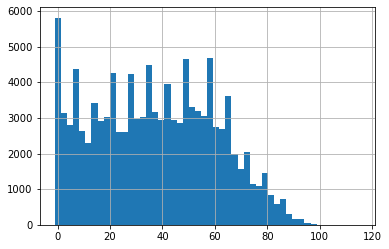

In [55]:
df.age.hist(bins=50);

There seems to be smooth distribution of the values near 0, so kind of makes sense to have very low values for `age` (for babies for example). This opens the possibility that the -1 age might be fixed to become age of 0. So now let's count how many data there is that have age lower than 0.

In [64]:
print(f'Number of rows with negative valued age: {sum(df.age < 0)}')

Number of rows with negative valued age: 1


There is only one row that has negative `age`, which means this is indeed a noise. To be safe and to avoid any wrong assumption, I'll just drop this single row with negative age.

In [73]:
df.drop(df[df.age < 0].index, inplace=True)

Now let's see the new distribution of `age`:

In [80]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

The print shows that we're good to go for `age`. As for the max value of 115, it is indeed possible for a human to be aged 115 years, because the oldest human in the world now is 122 years!

#### Confirming validity of `gender`

Firstly, let's check the `gender` unique values.

In [81]:
print(f'"gender" unique values: {df.gender.unique()}')

"gender" unique values: ['F' 'M']


The `gender` column has only the unique values shown above, which is valid and has no surprises.

#### Confirming validity of `neighbourhood`

As for `neighbourhood`, let's see the unique values as well. Also, we'll sort the values to check for possible typo (any typo will have more or less similar value, so sorting might help).

In [82]:
neighbourhood_values = df.neighbourhood.unique()
neighbourhood_values.sort()
print('\n'.join(neighbourhood_values))

AEROPORTO
ANDORINHAS
ANTÔNIO HONÓRIO
ARIOVALDO FAVALESSA
BARRO VERMELHO
BELA VISTA
BENTO FERREIRA
BOA VISTA
BONFIM
CARATOÍRA
CENTRO
COMDUSA
CONQUISTA
CONSOLAÇÃO
CRUZAMENTO
DA PENHA
DE LOURDES
DO CABRAL
DO MOSCOSO
DO QUADRO
ENSEADA DO SUÁ
ESTRELINHA
FONTE GRANDE
FORTE SÃO JOÃO
FRADINHOS
GOIABEIRAS
GRANDE VITÓRIA
GURIGICA
HORTO
ILHA DAS CAIEIRAS
ILHA DE SANTA MARIA
ILHA DO BOI
ILHA DO FRADE
ILHA DO PRÍNCIPE
ILHAS OCEÂNICAS DE TRINDADE
INHANGUETÁ
ITARARÉ
JABOUR
JARDIM CAMBURI
JARDIM DA PENHA
JESUS DE NAZARETH
JOANA D´ARC
JUCUTUQUARA
MARIA ORTIZ
MARUÍPE
MATA DA PRAIA
MONTE BELO
MORADA DE CAMBURI
MÁRIO CYPRESTE
NAZARETH
NOVA PALESTINA
PARQUE INDUSTRIAL
PARQUE MOSCOSO
PIEDADE
PONTAL DE CAMBURI
PRAIA DO CANTO
PRAIA DO SUÁ
REDENÇÃO
REPÚBLICA
RESISTÊNCIA
ROMÃO
SANTA CECÍLIA
SANTA CLARA
SANTA HELENA
SANTA LUÍZA
SANTA LÚCIA
SANTA MARTHA
SANTA TEREZA
SANTO ANDRÉ
SANTO ANTÔNIO
SANTOS DUMONT
SANTOS REIS
SEGURANÇA DO LAR
SOLON BORGES
SÃO BENEDITO
SÃO CRISTÓVÃO
SÃO JOSÉ
SÃO PEDRO
TABUAZEIRO
UNIVERSITÁ

There seems to be no obvious typo from the values of the `neighbourhood`. Once last check is to see the value with the minimum count, which might show typo as well.

In [156]:
df.neighbourhood.value_counts().idxmin()

'PARQUE INDUSTRIAL'

As you can see, the value with minimum count seems to be a valid value, hence this column is good to go.

#### `patient_id` and `appointment_id`

In [90]:
print(f'Number of duplicated patient_id: {sum(df.patient_id.duplicated())}')
print(f'Number of duplicated appointment_id: {sum(df.appointment_id.duplicated())}')

Number of duplicated patient_id: 48228
Number of duplicated appointment_id: 0


#### `scheduled_day` and `appointment_day`

It'll be interesting to see any data that has `scheduled_day` being later than the `appointment_day`, which will be invalid. But note that we'll check only for the date, and will not care about the time, because the `appointment_day` does not have time information.

In [107]:
scheduled_later = df.scheduled_day.dt.date > df.appointment_day
print(f'Number of rows that has scheduled_day date > appointment_day: {sum(scheduled_later)}')

Number of rows that has scheduled_day date > appointment_day: 5


In [108]:
df[scheduled_later]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,show_up
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,False,False,False,False,1,False,False
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,1,False,False
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,0,False,False
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,0,False,False
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,False,False,False,False,0,False,False


Since they're not a lot (only 5 rows), to avoid any wrong assumption, we'll just drop the rows with this invalid `scheduled_day` and `appointment_day` pairs.

In [111]:
df.drop(df[scheduled_later].index, inplace=True)

In [113]:
scheduled_later = df.scheduled_day.dt.date > df.appointment_day
print(f'Number of rows that has scheduled_day date > appointment_day: {sum(scheduled_later)}')

Number of rows that has scheduled_day date > appointment_day: 0


Now let's see the min and max values of these columns.

In [114]:
print(f'Min value for "scheduled_day": {df.scheduled_day.min()}')
print(f'Max value for "scheduled_day": {df.scheduled_day.max()}')
print(f'Min value for "appointment_day": {df.appointment_day.min()}')
print(f'Max value for "appointment_day": {df.appointment_day.max()}')

Min value for "scheduled_day": 2015-11-10 07:13:56
Max value for "scheduled_day": 2016-06-08 20:07:23
Min value for "appointment_day": 2016-04-29 00:00:00
Max value for "appointment_day": 2016-06-08 00:00:00


It is indeed weird for the `scheduled_day` to have minimum value much earlier than the minimum value of `appointment_day`. Let's see the rows having `scheduled_day` earlier than the year 2016.

In [119]:
earlier_than_2016 = df.scheduled_day.dt.year < 2016
print(f'Number of rows earlier than 2016: {sum(earlier_than_2016)}')

Number of rows earlier than 2016: 62


In [122]:
df[earlier_than_2016].head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handicap,show_up
3764,832256398961987,5030230,F,2015-11-10 07:13:56,2016-05-04,51,RESISTÊNCIA,False,False,False,False,0,True,True
27389,456681617875964,5156414,F,2015-12-14 08:01:54,2016-05-04,44,SANTA CECÍLIA,True,True,False,False,0,True,True
27390,49461353944737,5139826,M,2015-12-08 13:30:21,2016-05-11,52,SANTA CECÍLIA,False,True,False,False,0,True,False
27391,32729661994991,5140065,M,2015-12-08 13:58:50,2016-05-18,48,TABUAZEIRO,False,False,False,False,0,False,True
27392,942757755279,5140258,M,2015-12-08 14:18:39,2016-05-25,68,MARUÍPE,False,False,False,False,0,True,True


There's a lot of rows whose `scheduled_day` is before 2016, so they are not noise. Also looking at the data, there seems to be nothing wrong with them, so we'll keep those rows.

# ---------------------------------------------------------------------------------------
# ----------------------------- DRAFT --------------------------------------
# ---------------------------------------------------------------------------------------

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110526 non-null  object        
 1   appointment_id   110526 non-null  object        
 2   gender           110526 non-null  object        
 3   scheduled_day    110526 non-null  datetime64[ns]
 4   appointment_day  110526 non-null  datetime64[ns]
 5   age              110526 non-null  int64         
 6   neighbourhood    110526 non-null  object        
 7   scholarship      110526 non-null  bool          
 8   hipertension     110526 non-null  bool          
 9   diabetes         110526 non-null  bool          
 10  alcoholism       110526 non-null  bool          
 11  sms_received     110526 non-null  int64         
 12  handicap         110526 non-null  bool          
 13  show_up          110526 non-null  bool          
dtypes: bool(6), datetime

In [84]:
df.describe()

,age,sms_received
count,110526.000000,110526.000000
mean,37.089219,0.022248
std,23.110026,0.161543
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


In [87]:
for col in df.columns:
    print(f'Unique values for {col}: {df[col].unique()}')

Unique values for patient_id: ['29872499824296' '558997776694438' '4262962299951' ... '72633149253362'
 '996997666245785' '15576631729893']
Unique values for appointment_id: ['5642903' '5642503' '5642549' ... '5630692' '5630323' '5629448']
Unique values for gender: ['F' 'M']
Unique values for scheduled_day: ['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ... '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']
Unique values for appointment_day: ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 

Data wranglings that I've done:
- Converted PatientId and AppointmentID to be string, because those columns are seen to be long numbers whose quantity actually has no significance rather than just for identification.
- Also converted ScheduledDay and AppointmentDay to be datetime.
- Converted Scholarship, Hipertension, Diabetes, and Alcoholism to be boolean because I saw that they are ones and zeros to dictate yes or no.
- Converted No_show column to be boolean.

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

In [ ]:
df = pd.read_csv('data/no_show_appointments.csv',
                 dtype={'PatientId':'str',
                        'AppointmentID':'str',
                        'Scholarship': 'boolean',
                        'Hipertension': 'boolean',
                        'Diabetes': 'boolean',
                        'Alcoholism': 'boolean',
                        'SMS_received': 'boolean'},
                 parse_dates=['ScheduledDay', 'AppointmentDay'],
                 infer_datetime_format=True)

# correct the column names to be snake case
df.rename(columns=lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower(), inplace=True)
df.rename(columns=lambda x: x.replace('s_m_s', 'sms'), inplace=True)
df.rename(columns=lambda x: x.replace('i_d', 'id'), inplace=True)
df.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

df.head()

## Swap `handicap` and `sms_received`
it is assumed that `handicap` and `sms_received` columns were swapped by each other, because `sms_received` is supposed to be 
integer number while `handicap` is supposed to be boolean, but the values shows that `handicap` ranges from 0 to 4 whereas
`sms_received` is only 0 to 1. Since they're next to each other, I assume they are swapped with each other by the creator
of the data.

Unique values of `handicap`:

In [ ]:
print(df.handicap.unique())

Unique values of `sms_received`:

In [ ]:
print(df.sms_received.unique())

Swapping the column values below:

In [ ]:
df.rename(columns={'handicap': 'sms_received', 'sms_received': 'handicap'}, inplace=True)
df.head()[['sms_received', 'handicap']]

## Converting `no_show` to `show_up`
Unique values of `No_show`:

In [ ]:
print(df.no_show.unique())

In [ ]:
df.No_show = df.No_show.apply(lambda x: True if x == 'Yes' else False)
df.No_show.unique()

Create new column `show_up` that is inverted values of `No_show` columns. This new column gives better intuition.

In [ ]:
df['show_up'] = ~df['No_show']
df.drop(columns='No_show', inplace=True)

df.head()

# Prelim analysis

Possible number of appointments for each patient:

In [ ]:
print(df.groupby('PatientId')['AppointmentID'].count().unique())

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])